In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset
The customer churn dataset is a collection of customer data that focuses on predicting customer churn, which refers to the tendency of customers to stop using a company's products or services. The dataset contains various features that describe each customer, such as their credit score, country, gender, age, tenure, balance, number of products, credit card status, active membership, estimated salary, and churn status. The churn status indicates whether a customer has churned or not. The dataset is used to analyze and understand factors that contribute to customer churn and to build predictive models to identify customers at risk of churning. The goal is to develop strategies and interventions to reduce churn and improve customer retention

In [2]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# Univariate Analysis

<AxesSubplot:xlabel='credit_card', ylabel='count'>

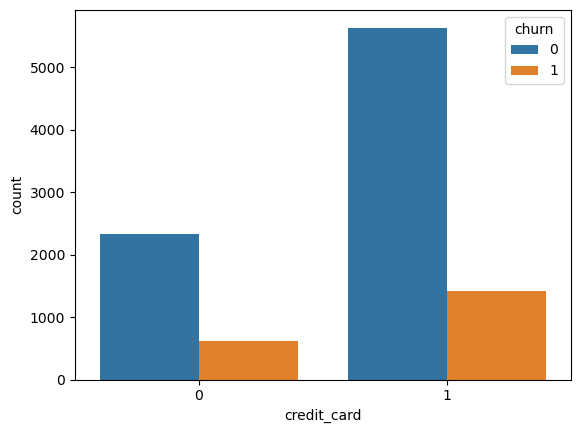

In [7]:
sns.countplot(x="credit_card",data=df,hue="churn")

The churn ratio is high for the customers with credit card .So there is a need for the bank to check it's credit card policies and give more flexibility and offers to it's customers.

In [8]:
df.drop(columns="customer_id",axis="columns",inplace=True)

In [9]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='country', ylabel='count'>

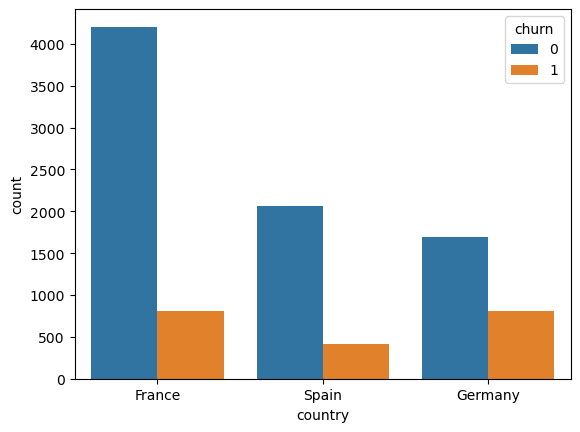

In [10]:
sns.countplot(x="country",data=df,hue="churn")

It's quite clear from the graph that most loyal customers are from france followed by spain and germany respectively.
Germany has highest number of churners so bank need to upgrade it's services in germany to ensure a user friendly experience in that country.

<AxesSubplot:xlabel='gender', ylabel='count'>

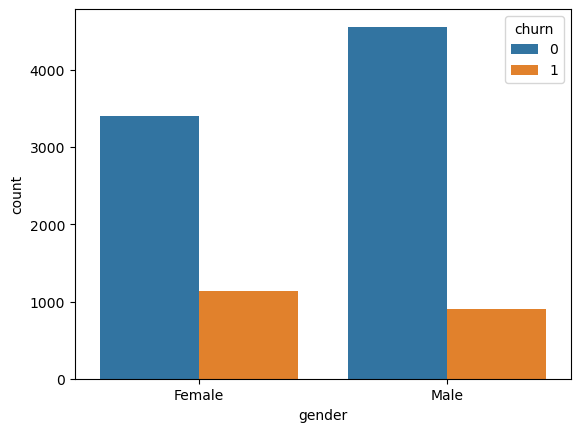

In [11]:
sns.countplot(x="gender",data=df,hue="churn")

Females have churned more than male .Also their churning ratio is more than the male.Bank needs to satisfy their female customers by providing them extra benefits and lower interest rates in order to attract more female customers.

In [12]:
df["tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

<AxesSubplot:xlabel='tenure', ylabel='count'>

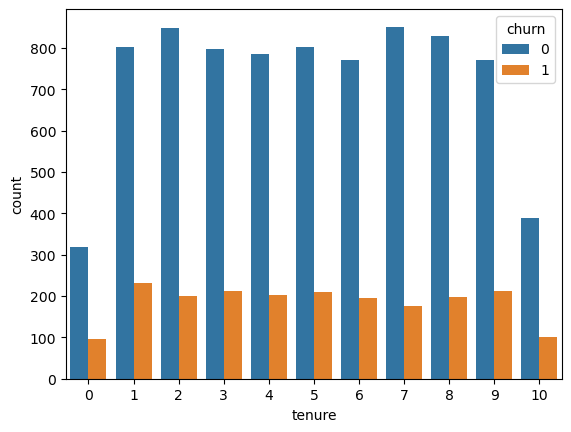

In [13]:
sns.countplot(x="tenure",data=df,hue="churn")

    Churning percentage is high at 0  and 10 years tenure(nearly touching 32) 

<AxesSubplot:xlabel='products_number', ylabel='count'>

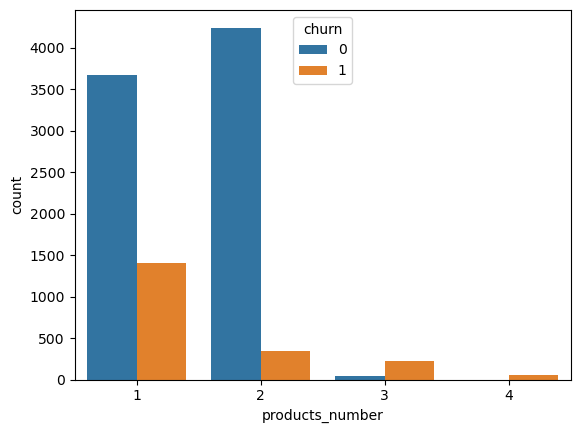

In [14]:
sns.countplot(x="products_number",data=df,hue="churn")

The  products provided by the bank are not up to the mark as churning percentage of more than 30 percent is observed in one product, lesser in case of two products(10%),
quiet higher in three and four products .
It is better if the banks promote the products and services with two products number as there is lesser possiblity of churning (<10%).Two products has most loyal number of customers and least churners.


<AxesSubplot:xlabel='estimated_salary', ylabel='Density'>

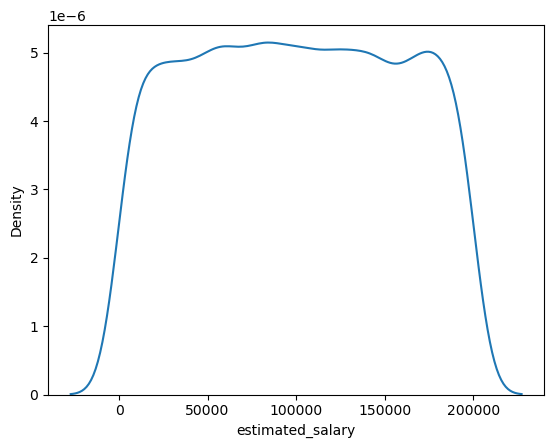

In [15]:
sns.kdeplot(x="estimated_salary",data=df)

<AxesSubplot:xlabel='credit_score', ylabel='Density'>

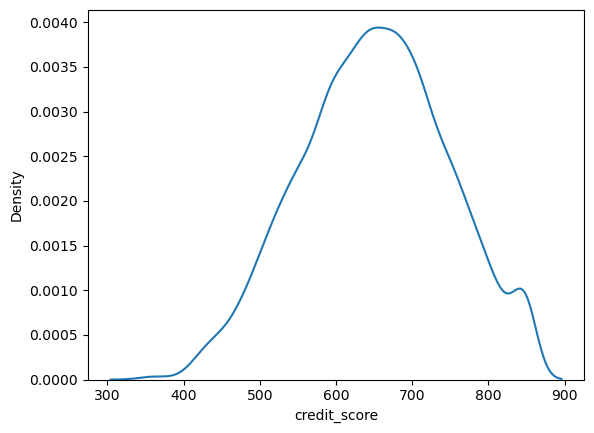

In [16]:
sns.kdeplot(x="credit_score",data=df)

<AxesSubplot:xlabel='balance', ylabel='Density'>

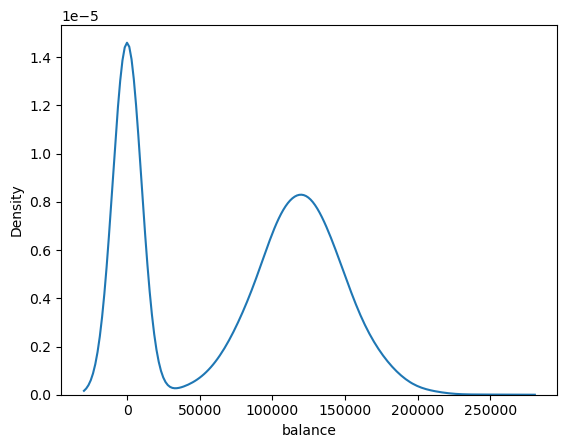

In [17]:
sns.kdeplot(x="balance",data=df)

In [18]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

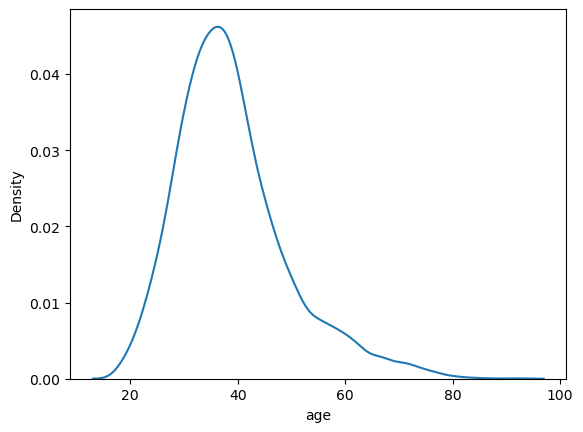

In [19]:
sns.kdeplot(x="age",data=df)

# 

# BIVARIATE ANALYSIS

In [20]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<AxesSubplot:xlabel='country', ylabel='estimated_salary'>

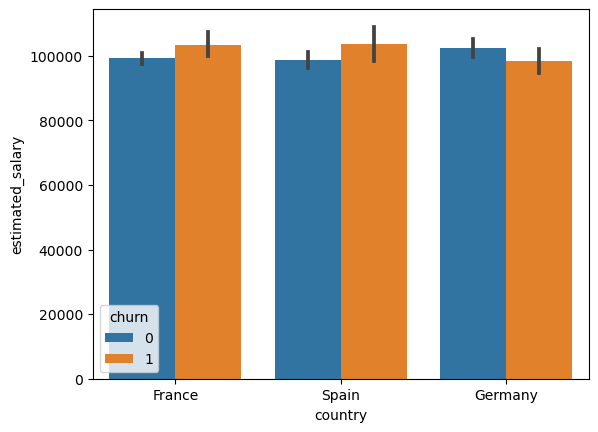

In [22]:
sns.barplot(x="country",y="estimated_salary",data=df,hue="churn")

<AxesSubplot:xlabel='country', ylabel='balance'>

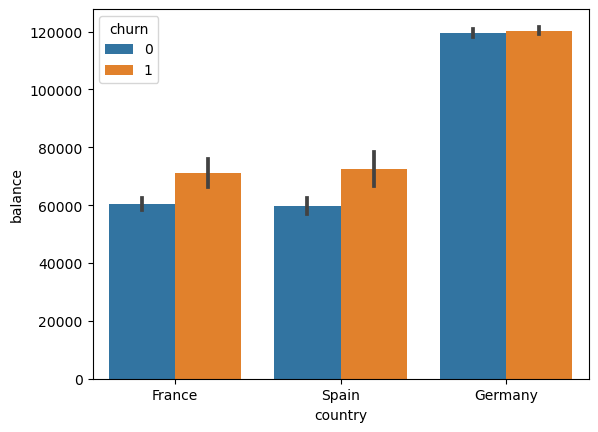

In [23]:
sns.barplot(x="country",y="balance",data=df,hue="churn")

In germany people have higher income due to higher savings so focussing on a quality buisness is must in germany because german customers would care more about service being given to them.In short although estimated salary is same in every region people of germany tend to save more .Hence it's more important for our bank to ensure the trust factor with german people to make them feel safe of their money.
People tend to save major part of their salary in germany.

<AxesSubplot:xlabel='country', ylabel='credit_score'>

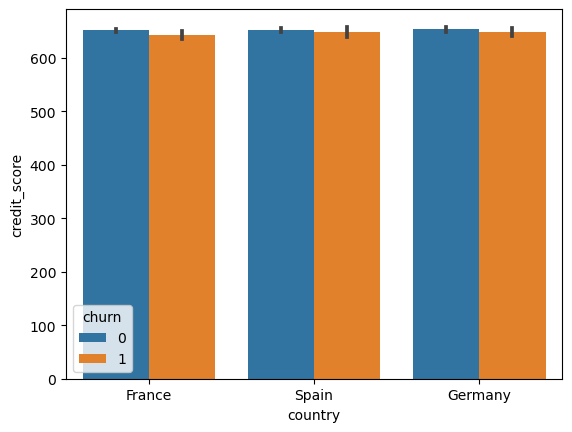

In [24]:
sns.barplot(x="country",y="credit_score",data=df,hue="churn")

<AxesSubplot:xlabel='country', ylabel='age'>

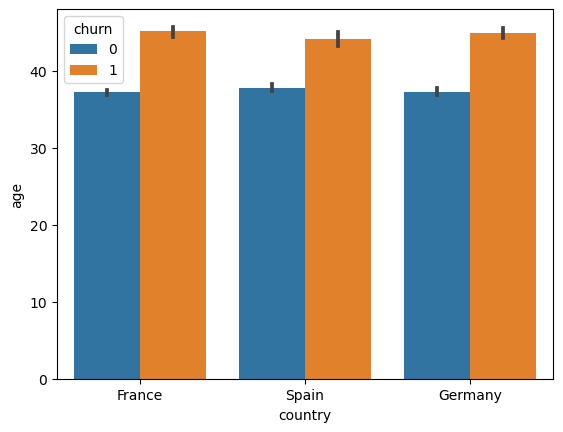

In [25]:
sns.barplot(x="country",y="age",data=df,hue="churn")

In each country we can observe that the people who prefer to churn out are middle-aged or senior citizen people from the respective country.Therefore it is quite evident that people are not satisfied with long term services provided by the bank and churn out at the mid-way there is need to revamp the whole process of policy for the betterment of banks customers and make our bank more profitable thereby.

# CORRELATION ANALYSIS

In [26]:
df.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

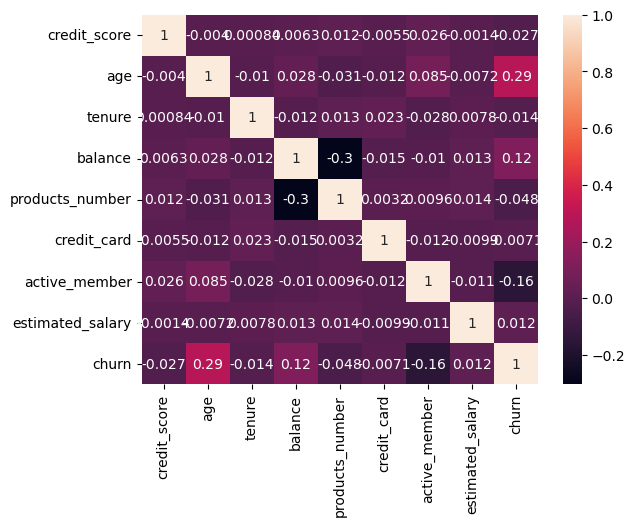

In [27]:
sns.heatmap(df.corr(),annot=True)

From the heatmap we can visualize that the most contributing factors to churning age,balance and active member
Increasing age ,increase in churn also.The same fact is true for balance.
However an inverse trend is seen in case of active member
if a customer is not an active member,he/she will definitely churn.

In [28]:
 bins = [0, 10, 20, 30,40,50,60,70,80,90,100]

# bin the age column
df['age'] = pd.cut(df['age'], bins)


In [29]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,"(40, 50]",2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,"(40, 50]",1,83807.86,1,0,1,112542.58,0
2,502,France,Female,"(40, 50]",8,159660.80,3,1,0,113931.57,1
3,699,France,Female,"(30, 40]",1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,"(40, 50]",2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='age', ylabel='count'>

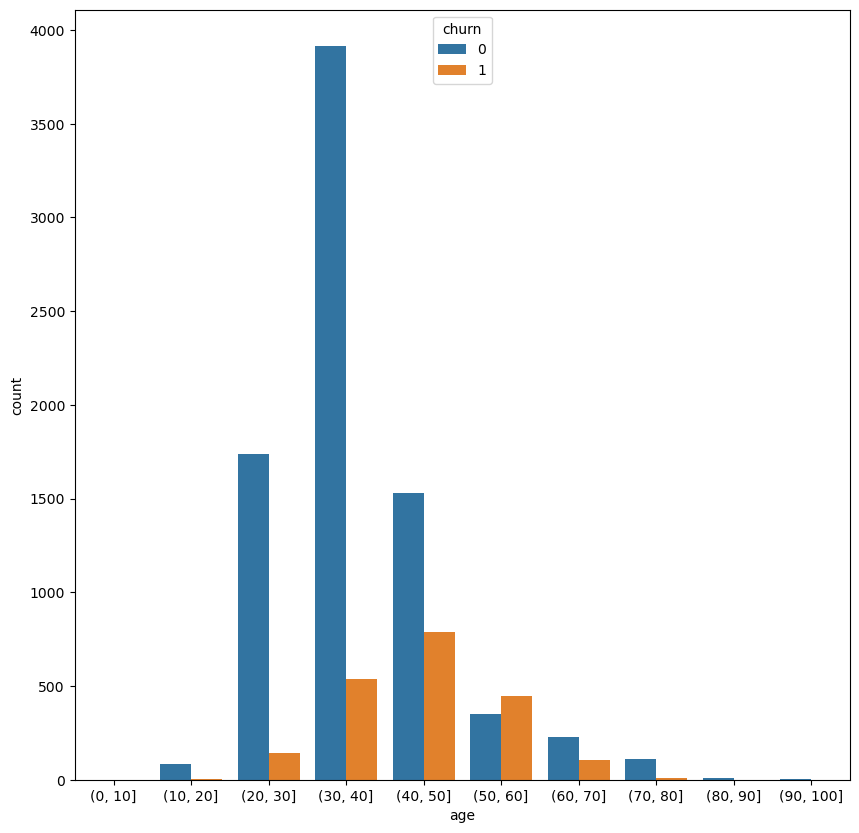

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(x="age",hue="churn",data=df)


Churning rate is quite high in 40-70 age group .This is the age group which generally focus more on roi rather than cheap services so quality asssurance is quite important for these banks.So bank must try to retain these customers to avoid churning

<AxesSubplot:xlabel='age', ylabel='balance'>

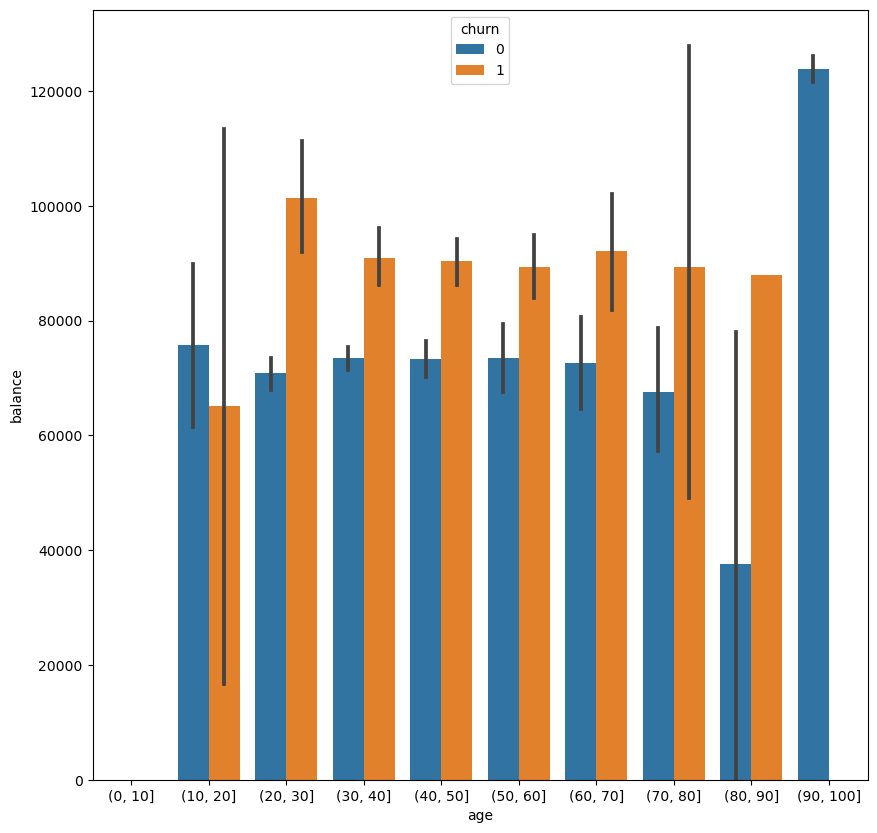

In [31]:
plt.figure(figsize=(10,10))
sns.barplot(x="age",y="balance",data=df,hue="churn")

<AxesSubplot:xlabel='age', ylabel='estimated_salary'>

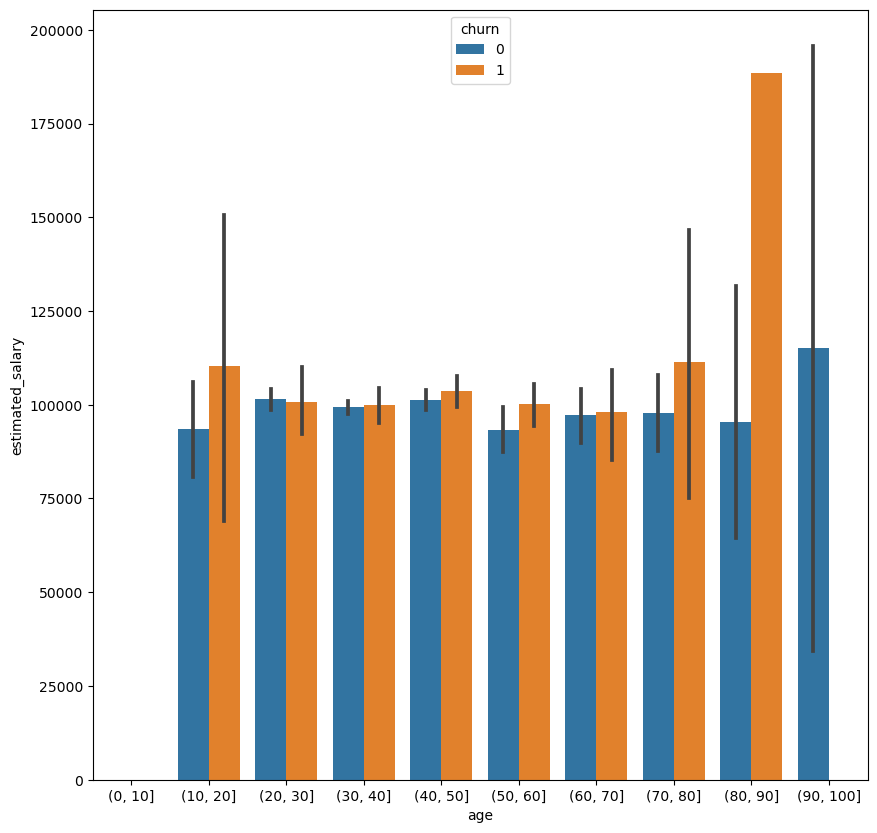

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(x="age",y="estimated_salary",data=df,hue="churn")

So it is quite evident that customers with more balance are tending churn more out from the bank.Therefore, it is a clear indication that bank services are not upto the mark and people not feel secure to put their money in our bank.
Failure of Security assurance is one of the biggest factor for churning.

<AxesSubplot:xlabel='age', ylabel='count'>

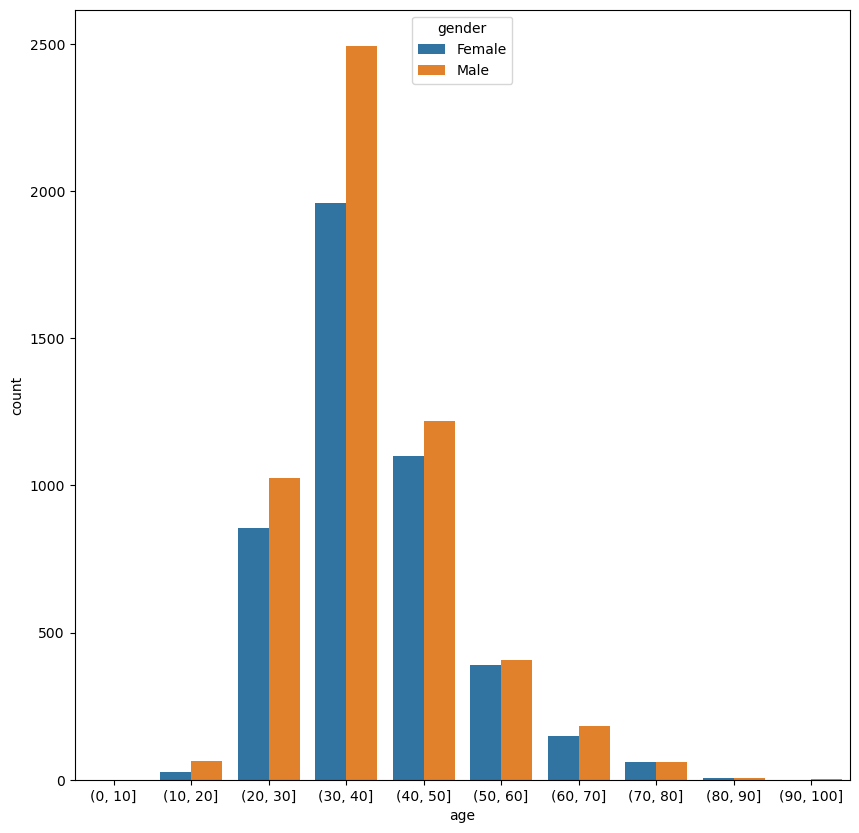

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x="age",data=df,hue="gender")

<AxesSubplot:xlabel='gender', ylabel='count'>

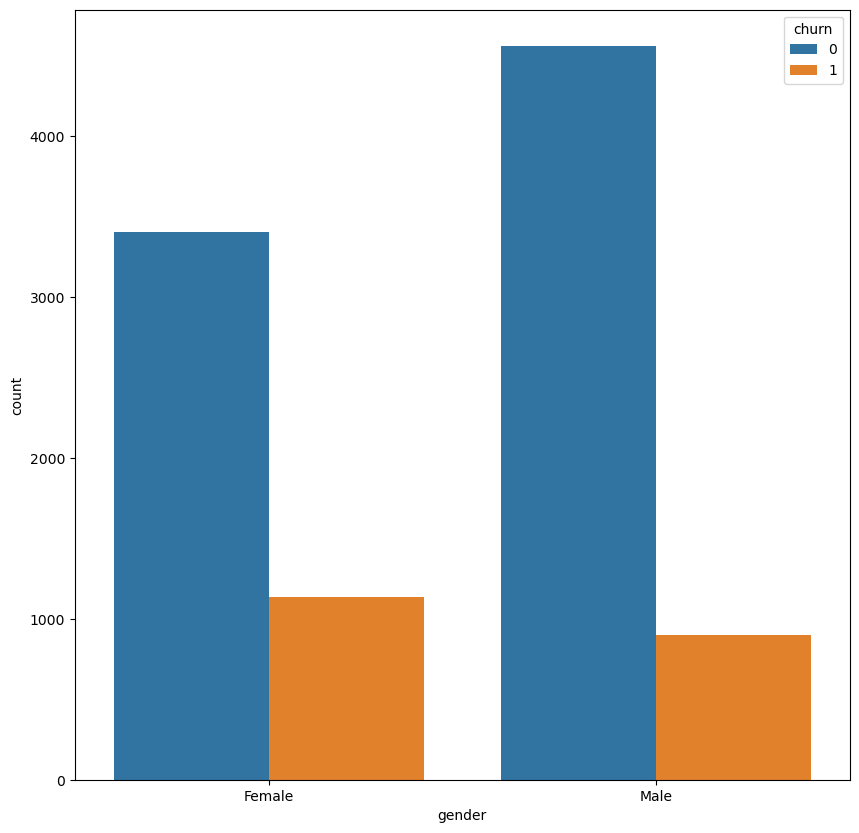

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(x="gender",data=df,hue="churn")

Females have churned more despite of having lesser participation in banks!!!
This is one more critical factor for our analysis as we  have more female churned customers.So banks must ensure gender specific policies 
to lessen the female churning